In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data in python enviroment

In [75]:
data=pd.read_csv('/content/titanic_dataset .csv')

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data preprocessing

In [ ]:
#missing value imputation

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
data.drop('Cabin',axis=1,inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [81]:
data['Age'] =data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [82]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#outliers dection and IQR method for removal of outliers

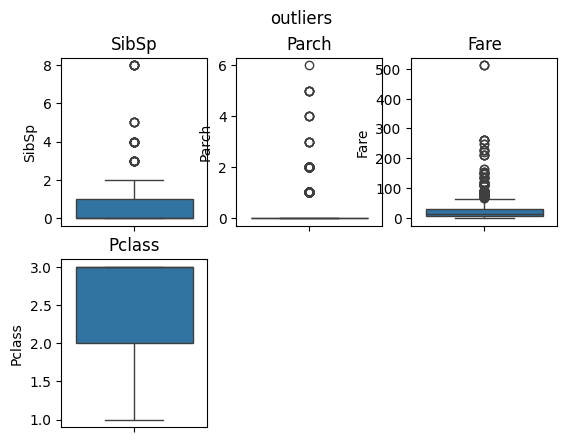

In [83]:
plt.suptitle('outliers')
plt.subplot(2,3,1)
sns.boxplot(y=data.SibSp)
plt.title('SibSp')
plt.subplot(2,3,2)
sns.boxplot(y=data.Parch)
plt.title('Parch')
plt.subplot(2,3,3)
sns.boxplot(y=data.Fare)
plt.title('Fare')
plt.subplot(2,3,4)
sns.boxplot(y=data.Pclass)
plt.title('Pclass')
plt.show()

In [84]:
for i in ['SibSp','Parch','Fare']:
    Q1=np.percentile(data[i],25,method='midpoint')
    Q2=np.percentile(data[i],50,method='midpoint')
    Q3=np.percentile(data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in data[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    data[i]=data[i].clip(lower=low_lim,upper=up_lim)

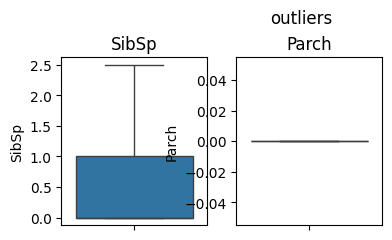

In [85]:
plt.suptitle('outliers')
plt.subplot(2,3,1)
sns.boxplot(y=data.SibSp)
plt.title('SibSp')
plt.subplot(2,3,2)
sns.boxplot(y=data.Parch)
plt.title('Parch')
plt.show()

In [ ]:
#encoding the data

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [89]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [90]:
data.drop('PassengerId',axis=1,inplace=True)

<ipython-input-93-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


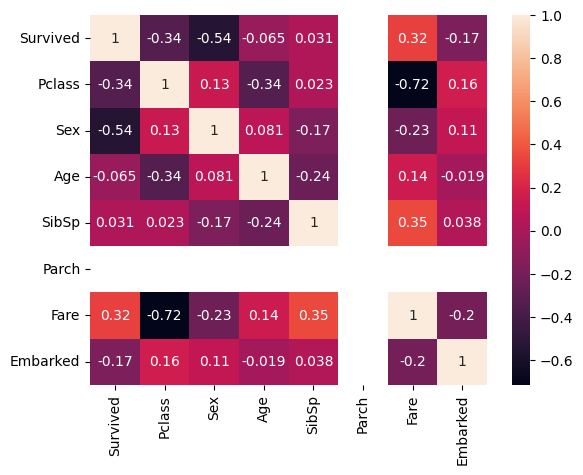

In [93]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#Target variable, Y - Survived
#predictors, X - Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [97]:
X=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=data['Survived']

In [99]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0,7.2500,2
1,1,0,38.0,1.0,0,65.6344,0
2,3,0,26.0,0.0,0,7.9250,2
3,1,0,35.0,1.0,0,53.1000,2
4,3,1,35.0,0.0,0,8.0500,2


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)

In [ ]:
#KNN METHOD

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
knn=KNeighborsClassifier

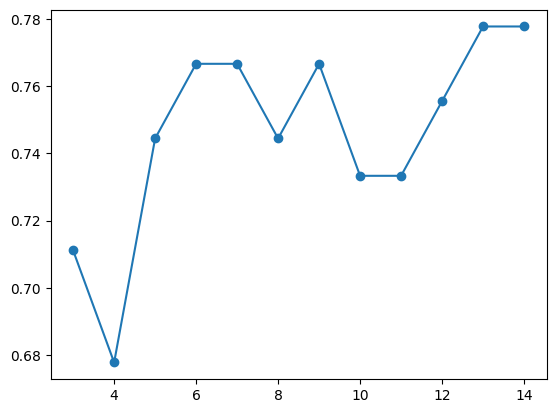

In [110]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')
plt.show()

In [137]:
kn_classifier=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
kn_classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [138]:
accurac_knny=accuracy_score(y_test,knn_pred)
precision_knn=precision_score(y_test,knn_pred)

In [124]:
print("Accuracy of Knn", accuracy)
print("Precision of Knnr", precision)

Accuracy of SVM Classifier: 0.7777777777777778
Precision of SVM Classifier 0.7857142857142857


In [139]:
knn_score=kn_classifier.score(X_test,y_test)

In [129]:
knn_score

0.7777777777777778

In [ ]:
#SVM method

In [126]:
from sklearn.svm import SVC
sv=SVC()

In [133]:
sv=SVC()
sv_c=sv.fit(X_train,y_train)
svm_pred = sv.predict(X_test)

In [119]:
accuracy=accuracy_score(y_test, svm_pred)
precision=precision_score(y_test,svm_pred)

In [125]:
print("Accuracy of SVM", accuracy)
print("Precision of SVM", precision)

Accuracy of SVM 0.7777777777777778
Precision of SVM 0.7857142857142857


In [134]:
sv_score=sv_c.score(X_test,y_test)

In [135]:
sv_score

0.7

In [ ]:
# k fold model in KNN method

In [131]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [140]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(kn_classifier,X,y,cv=kfold_validator)

In [141]:
cv_result

array([0.62222222, 0.6741573 , 0.68539326, 0.73033708, 0.68539326,
       0.7752809 , 0.76404494, 0.75280899, 0.80898876, 0.7752809 ])

In [162]:
avg_accuracy_knn=cv_result.mean()

In [ ]:
#stratifiedkfold in knn method

In [149]:
from sklearn.model_selection import StratifiedKFold
strat_validator = StratifiedKFold(n_splits=10)

In [150]:
str_result=cross_val_score(kn_classifier,X,y,cv=strat_validator)

In [151]:
str_result

array([0.63333333, 0.64044944, 0.6741573 , 0.7752809 , 0.70786517,
       0.71910112, 0.78651685, 0.74157303, 0.7752809 , 0.75280899])

In [168]:
avg_accuracy_stratified_knn=str_result.mean()

In [ ]:
#kfold in SVM

In [153]:
cv_result_sv=cross_val_score(sv_c,X,y,cv=kfold_validator)

In [154]:
cv_result_sv

array([0.52222222, 0.66292135, 0.65168539, 0.69662921, 0.65168539,
       0.70786517, 0.68539326, 0.73033708, 0.7752809 , 0.70786517])

In [163]:
avg_accuracy_svm=cv_result_sv.mean()

In [ ]:
#stratified k-fold in SVM

In [156]:
str_result=cross_val_score(sv_c,X,y,cv=strat_validator)

In [157]:
str_result

array([0.54444444, 0.59550562, 0.69662921, 0.76404494, 0.68539326,
       0.71910112, 0.73033708, 0.75280899, 0.76404494, 0.68539326])

In [165]:
avg_accuracy_stratified_svm=str_result.mean()

In [166]:
print("Average Accuracy - kNN (K-Fold):", avg_accuracy_knn)
print("Average Accuracy - SVM (K-Fold):", avg_accuracy_svm)
print("Average Accuracy - kNN (Stratified K-Fold):", avg_accuracy_stratified_knn)
print("Average Accuracy - SVM (Stratified K-Fold):", avg_accuracy_stratified_svm)

Average Accuracy - kNN (K-Fold): 0.7273907615480649
Average Accuracy - SVM (K-Fold): 0.6791885143570536
Average Accuracy - kNN (Stratified K-Fold): 0.6937702871410737
Average Accuracy - SVM (Stratified K-Fold): 0.6937702871410737
